### Introduction
## Import Data
First, let's use the pandas library to import the data and store it.

In [57]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

dl1 = pd.read_csv("../data/DL1March_May_24.csv").drop(columns="No.")
dl3 = pd.read_csv("../data/DL3March_May_24.csv").drop(columns="No.")

print(dl1.head())

          Date/Time  Cost (£)  Energy (kWh)  Power (kW)  Power Factor  \
0  04/03/2024 12:00      0.01          0.01         0.1          0.40   
1  04/03/2024 12:30      0.14          1.36         2.7         -0.97   
2  04/03/2024 13:00      0.25          2.52         5.0         -0.97   
3  04/03/2024 13:30      0.25          2.52         5.0         -0.97   
4  04/03/2024 14:00      0.25          2.54         5.1         -0.97   

   Current 1 (amps)  
0              54.6  
1              22.9  
2              22.8  
3              22.9  
4              23.1  


Let's only consider DL1 for now.
Now, time to plot the raw data, and obtain the autocorrelation matrix.

<Axes: xlabel='Date/Time'>

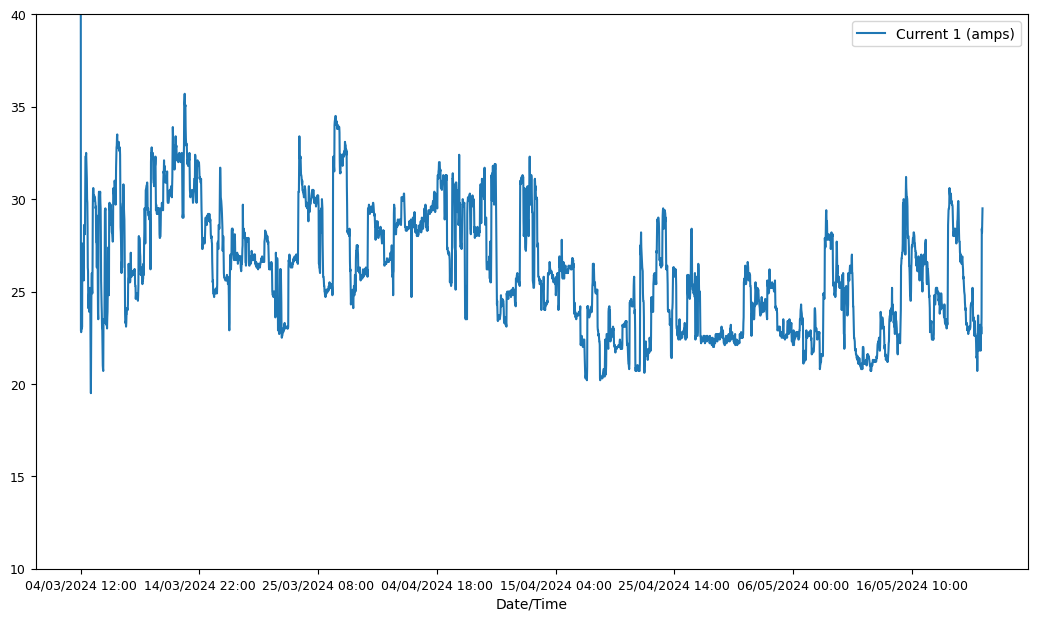

In [58]:
dl1.plot(x="Date/Time", y="Current 1 (amps)", figsize=[12.80, 7.20], fontsize=9, ylim=[10, 40])

A possible idea could be to do an FFT: as we know the sample size is 30 mins, we can get an accurate reading of the frequency of the current, up to a precision of 1 hour^-1.

It is interesting to remove the first element of the FFT, as this essentially removes the constant component. We are now left with only the varying parts

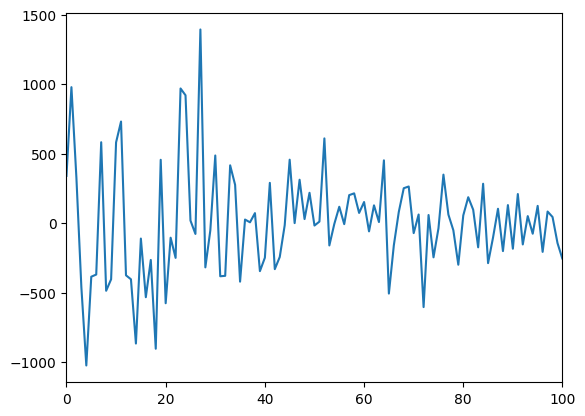

In [68]:
dl1_fft = sp.fft.fft(np.array(dl1["Current 1 (amps)"]))
plt.plot(dl1_fft[1:])
plt.xlim([0, 100])
plt.show()